In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
lst = []
for i,im in enumerate(y_train):
  if im==1:
    lst.append(i)
print(lst)
lst = np.array(lst)

[4, 5, 32, 44, 45, 46, 60, 61, 64, 65, 75, 79, 94, 96, 97, 99, 105, 112, 119, 126, 134, 136, 137, 140, 160, 168, 176, 184, 201, 206, 212, 226, 227, 236, 238, 250, 255, 257, 261, 262, 275, 282, 301, 302, 304, 311, 312, 323, 325, 330, 354, 364, 375, 389, 393, 396, 427, 432, 454, 461, 466, 482, 486, 493, 498, 506, 524, 536, 547, 561, 565, 568, 576, 578, 590, 593, 599, 606, 617, 644, 676, 690, 699, 714, 743, 747, 753, 761, 772, 815, 823, 833, 834, 835, 840, 841, 848, 855, 873, 874, 879, 893, 917, 936, 942, 947, 962, 977, 978, 980, 991, 997, 1006, 1020, 1021, 1029, 1037, 1052, 1064, 1068, 1079, 1090, 1095, 1103, 1145, 1153, 1170, 1240, 1242, 1251, 1287, 1293, 1301, 1304, 1305, 1320, 1356, 1364, 1377, 1380, 1389, 1394, 1408, 1410, 1413, 1421, 1446, 1448, 1455, 1464, 1476, 1494, 1502, 1520, 1541, 1547, 1548, 1551, 1559, 1565, 1570, 1571, 1574, 1578, 1586, 1599, 1604, 1605, 1611, 1621, 1631, 1651, 1660, 1681, 1689, 1694, 1707, 1724, 1731, 1736, 1747, 1781, 1790, 1799, 1820, 1869, 1901, 1907, 1

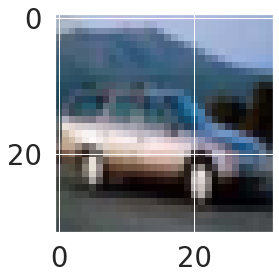

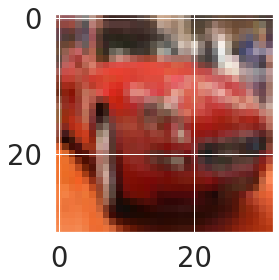

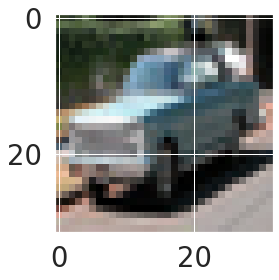

In [6]:
for i in range(3):
  plt.imshow(x_train[lst[i]])
  plt.show()

In [7]:
#Part A

In [8]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [9]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = test_datagen.flow(
    x_test,y_test
)

In [10]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(128,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [11]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0       

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
48/48 [==============================] - 34s 24ms/step - loss: 2.3678 - sparse_categorical_accuracy: 0.1815 - val_loss: 2.1091 - val_sparse_categorical_accuracy: 0.2326
Epoch 2/500
48/48 [==============================] - 1s 17ms/step - loss: 2.0934 - sparse_categorical_accuracy: 0.2636 - val_loss: 2.0569 - val_sparse_categorical_accuracy: 0.2674
Epoch 3/500
48/48 [==============================] - 1s 16ms/step - loss: 2.0350 - sparse_categorical_accuracy: 0.2631 - val_loss: 2.2881 - val_sparse_categorical_accuracy: 0.1458
Epoch 4/500
48/48 [==============================] - 1s 17ms/step - loss: 1.9248 - sparse_categorical_accuracy: 0.3194 - val_loss: 1.8628 - val_sparse_categorical_accuracy: 0.3542
Epoch 5/500
48/48 [==============================] - 1s 17ms/step - loss: 1.9129 - sparse_categorical_accuracy: 0.2869 - val_loss: 1.9058 - val_sparse_categorical_accuracy: 0.3299
Epoch 6/500
48/48 [==============================] - 1s 17ms/step - loss: 1.9220 - sparse_categoric

In [14]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 327.8832 - sparse_categorical_accuracy: 0.4636


[327.88323974609375, 0.4636000096797943]

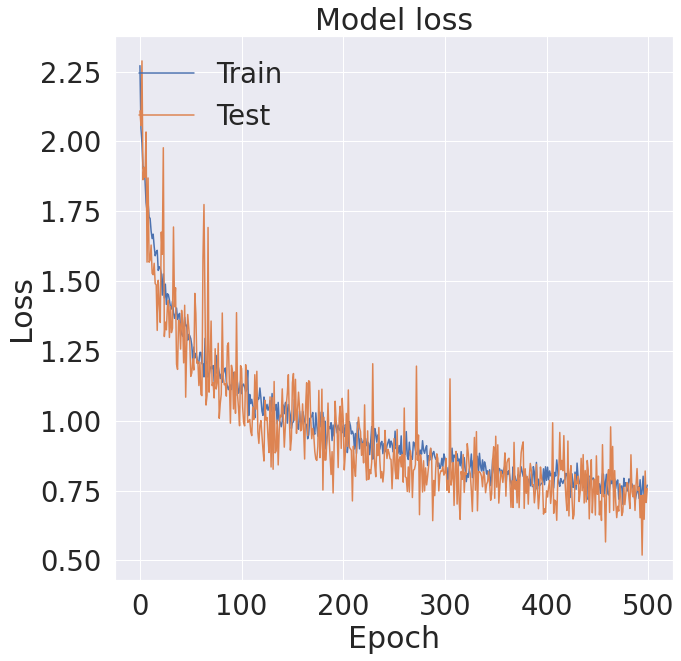

In [15]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
#Part B

In [17]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [18]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = test_datagen.flow(
    x_test,y_test
)

In [19]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(32,1,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,1,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(64,1,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(128,1,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [20]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        1056      
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248    

In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


48/48 [==============================] - 2s 24ms/step - loss: 2.3135 - sparse_categorical_accuracy: 0.1512 - val_loss: 2.2614 - val_sparse_categorical_accuracy: 0.1875
Epoch 2/500
48/48 [==============================] - 1s 18ms/step - loss: 2.0251 - sparse_categorical_accuracy: 0.2620 - val_loss: 2.2218 - val_sparse_categorical_accuracy: 0.1667
Epoch 3/500
48/48 [==============================] - 1s 18ms/step - loss: 1.9055 - sparse_categorical_accuracy: 0.3055 - val_loss: 2.2479 - val_sparse_categorical_accuracy: 0.1424
Epoch 4/500
48/48 [==============================] - 1s 17ms/step - loss: 1.9165 - sparse_categorical_accuracy: 0.2644 - val_loss: 1.9941 - val_sparse_categorical_accuracy: 0.2569
Epoch 5/500
48/48 [==============================] - 1s 17ms/step - loss: 1.8655 - sparse_categorical_accuracy: 0.3456 - val_loss: 2.0621 - val_sparse_categorical_accuracy: 0.3264
Epoch 6/500
48/48 [==============================] - 1s 17ms/step - loss: 1.8223 - sparse_categorical_accuracy: 

In [23]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 376.3190 - sparse_categorical_accuracy: 0.3842


[376.3190002441406, 0.38420000672340393]

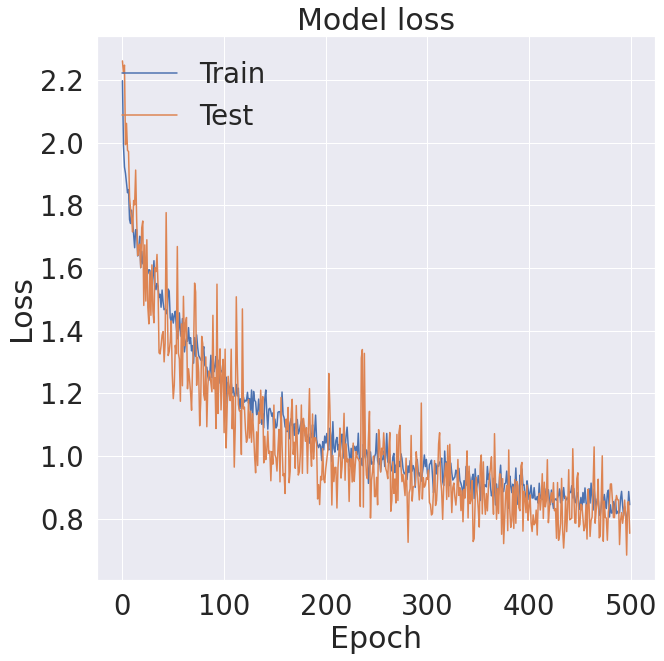

In [24]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
#Part C

In [26]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [27]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = test_datagen.flow(
    x_test,y_test
)

In [28]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.DepthwiseConv2D(3,1,padding = 'valid')(net)
net = layers.SeparableConv2D(32,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.DepthwiseConv2D(3,1,padding = 'valid')(net)
net = layers.SeparableConv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [29]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 14, 14, 32)        320       
_________________________________________________________________
separable_conv2d (SeparableC (None, 14, 14, 32)        1344      
_________________________________________________________________
activation_15 (Activation)   (None, 14, 14, 32)        0       

In [30]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


48/48 [==============================] - 2s 20ms/step - loss: 2.3159 - sparse_categorical_accuracy: 0.1143 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1458
Epoch 2/500
48/48 [==============================] - 1s 17ms/step - loss: 2.2828 - sparse_categorical_accuracy: 0.1438 - val_loss: 2.2768 - val_sparse_categorical_accuracy: 0.1354
Epoch 3/500
48/48 [==============================] - 1s 18ms/step - loss: 2.1564 - sparse_categorical_accuracy: 0.1773 - val_loss: 2.2751 - val_sparse_categorical_accuracy: 0.1250
Epoch 4/500
48/48 [==============================] - 1s 17ms/step - loss: 2.0952 - sparse_categorical_accuracy: 0.1981 - val_loss: 2.2446 - val_sparse_categorical_accuracy: 0.2014
Epoch 5/500
48/48 [==============================] - 1s 17ms/step - loss: 2.0345 - sparse_categorical_accuracy: 0.2168 - val_loss: 2.2166 - val_sparse_categorical_accuracy: 0.2326
Epoch 6/500
48/48 [==============================] - 1s 17ms/step - loss: 1.9593 - sparse_categorical_accuracy: 

In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 258.6194 - sparse_categorical_accuracy: 0.3966


[258.6194152832031, 0.39660000801086426]

In [33]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 258.6194 - sparse_categorical_accuracy: 0.3966


[258.6194152832031, 0.39660000801086426]

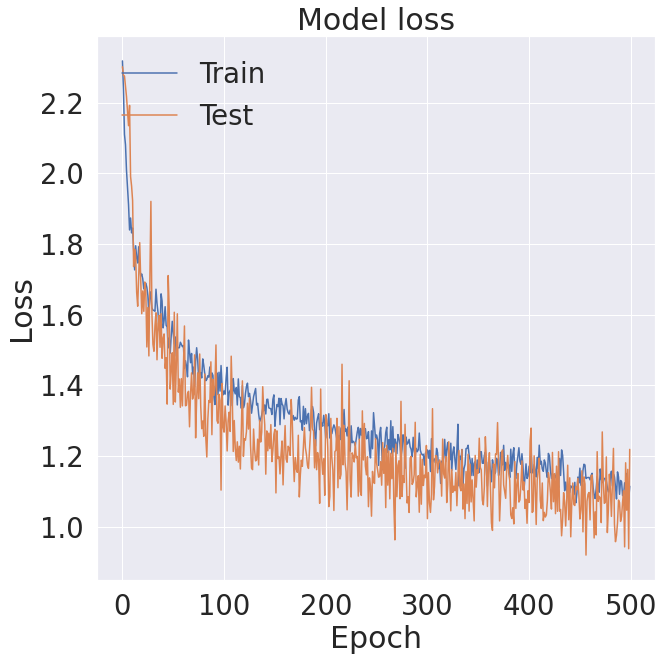

In [34]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()